In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\heart.csv')
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
df.isnull().sum().sort_values

<bound method Series.sort_values of age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64>

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

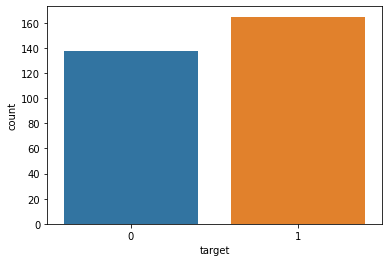

In [5]:
#to see if the dataset is balanced, used a count plot
sns.countplot(data=df, x='target')

In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

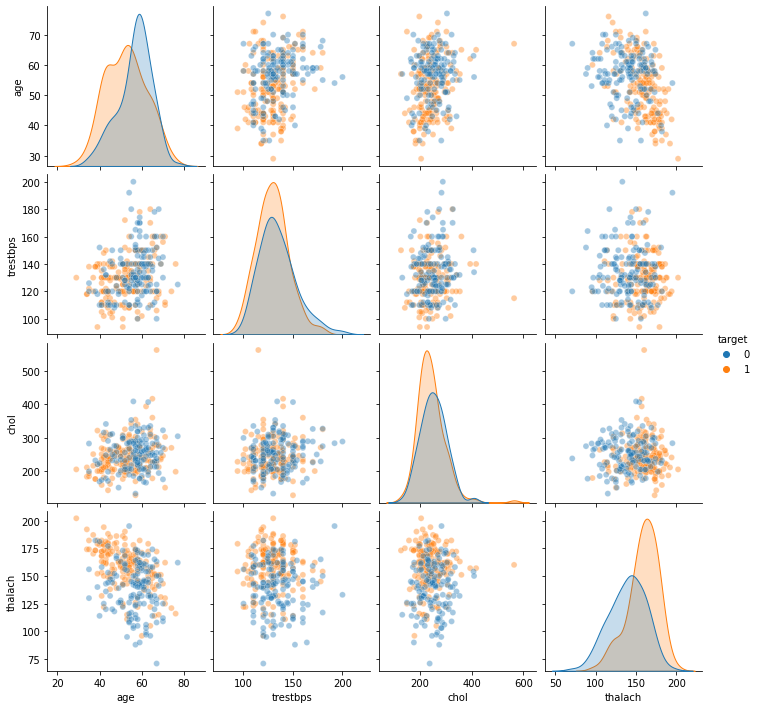

In [15]:
sns.pairplot(df[['age','trestbps', 'chol', 'thalach','target']], hue='target', plot_kws={'alpha':0.4})

<AxesSubplot:>

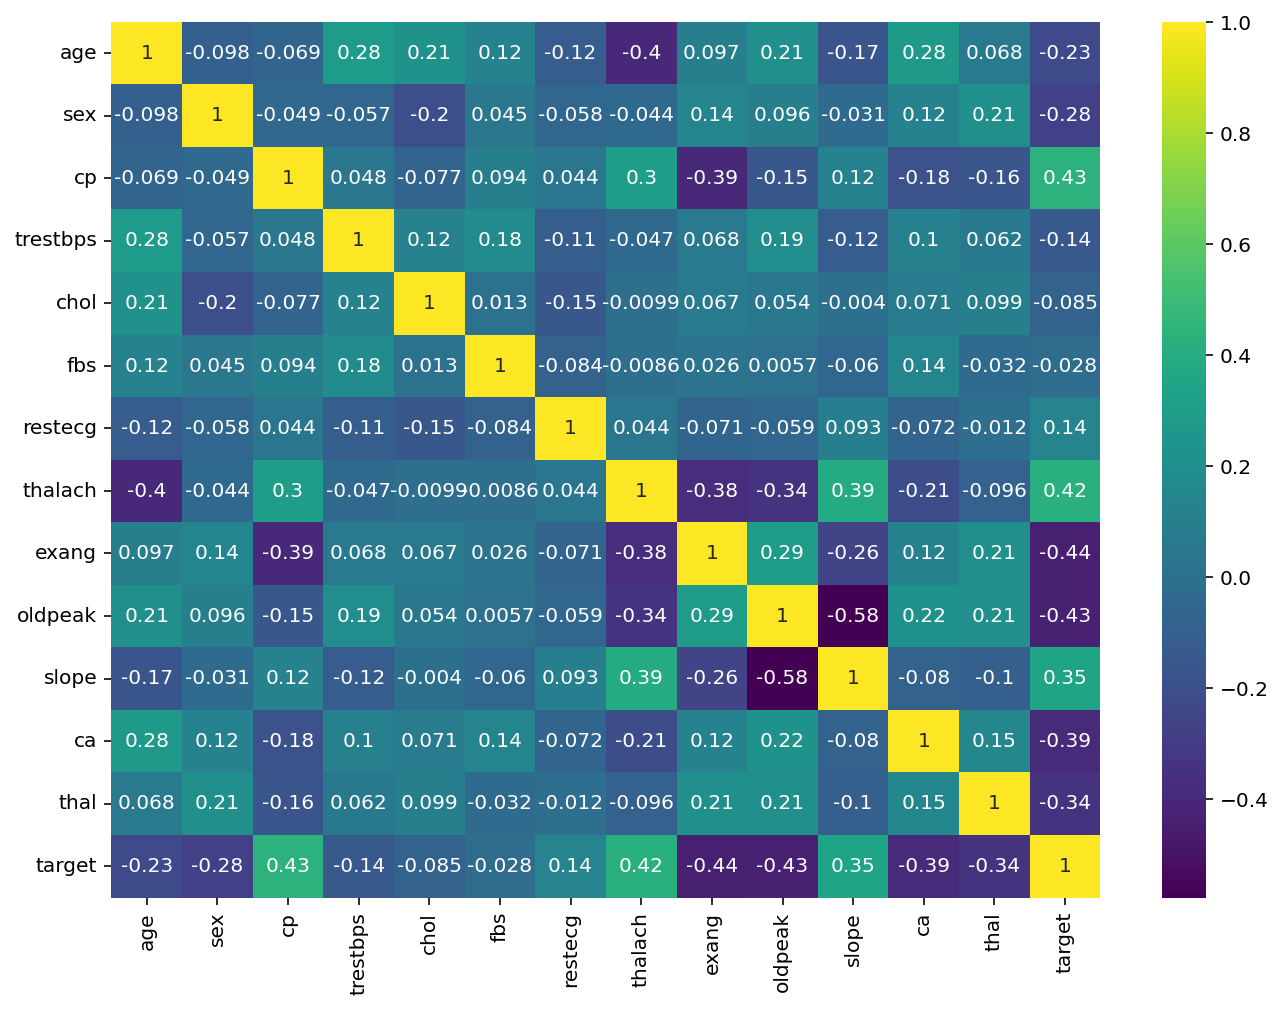

In [17]:
plt.figure(figsize=(11,8), dpi=145)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

##train test split and scale

In [19]:
  X= df.drop('target', axis =1)

In [20]:
y=df['target']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [24]:
scaler = StandardScaler()

In [33]:
scaled_X_train = scaler.fit_transform(X_train)

In [32]:
scaled_X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegressionCV   

In [28]:
logistic = LogisticRegressionCV()    #by default the model ill take default parameters for CV

In [34]:
logistic.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [35]:
logistic.Cs_ #TO VIE THE CV OUTPUTS  

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [37]:
logistic.C_  #TO SEE THE BEST VALUE AFTER PERFORMING CV

array([0.04641589])

In [39]:
logistic.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [40]:
logistic.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

In [55]:
coefz = pd.Series(index=X.columns,data=logistic.coef_[0])
coefz

age        -0.096212
sex        -0.394602
cp          0.535347
trestbps   -0.138502
chol       -0.088305
fbs         0.024873
restecg     0.080838
thalach     0.299141
exang      -0.334382
oldpeak    -0.352386
slope       0.251010
ca         -0.497358
thal       -0.374486
dtype: float64

<AxesSubplot:>

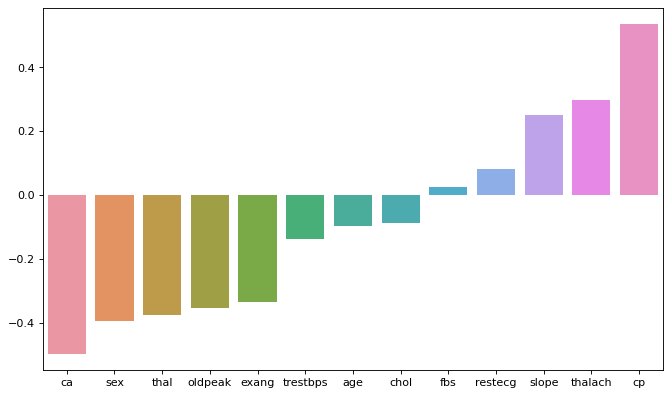

In [60]:
plt.figure(figsize=(10,6), dpi=80)
coefz = coefz.sort_values()
sns.barplot(x=coefz.index, y=coefz.values)

In [71]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [62]:
y_pred = logistic.predict(scaled_X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
confusion_matrix(y_pred,y_test)

array([[12,  2],
       [ 3, 14]], dtype=int64)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


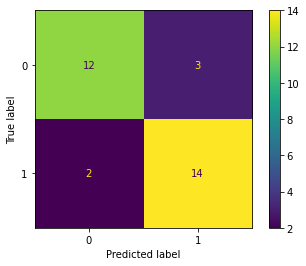

In [67]:
plot_confusion_matrix(logistic, scaled_X_test, y_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


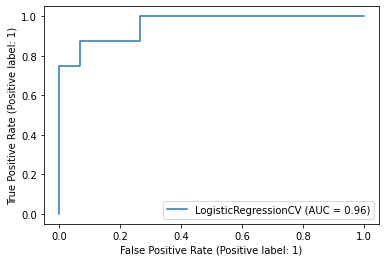

In [70]:
plot_roc_curve(logistic, scaled_X_test, y_test)

c:\Users\USER\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


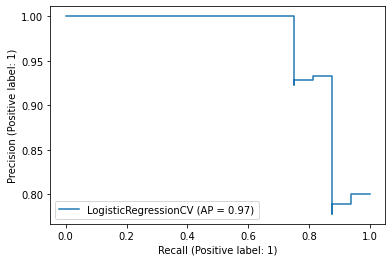

In [72]:
plot_precision_recall_curve(logistic, scaled_X_test, y_test)

In [73]:
patient = [[54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2.]]      ###note tthat tthis data has to be scaled

In [74]:
logistic.predict(patient)

array([0], dtype=int64)

In [75]:
logistic.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])